# Classifying Digits using a CNN

<div style='text-align: justify'>This notebook is a simple tutorial on how to classify digits in the MNIST dataset using a convolutional neural network. To do that, lets first import tensorflow.</div>

In [1]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

## MNIST Dataset

<div style='text-align: justify'>To speed up the training process for neural networks, we first normalize the mnist dataset by dividing each entry by 255. That way, each instance has all entries between 0 and 1. </div>

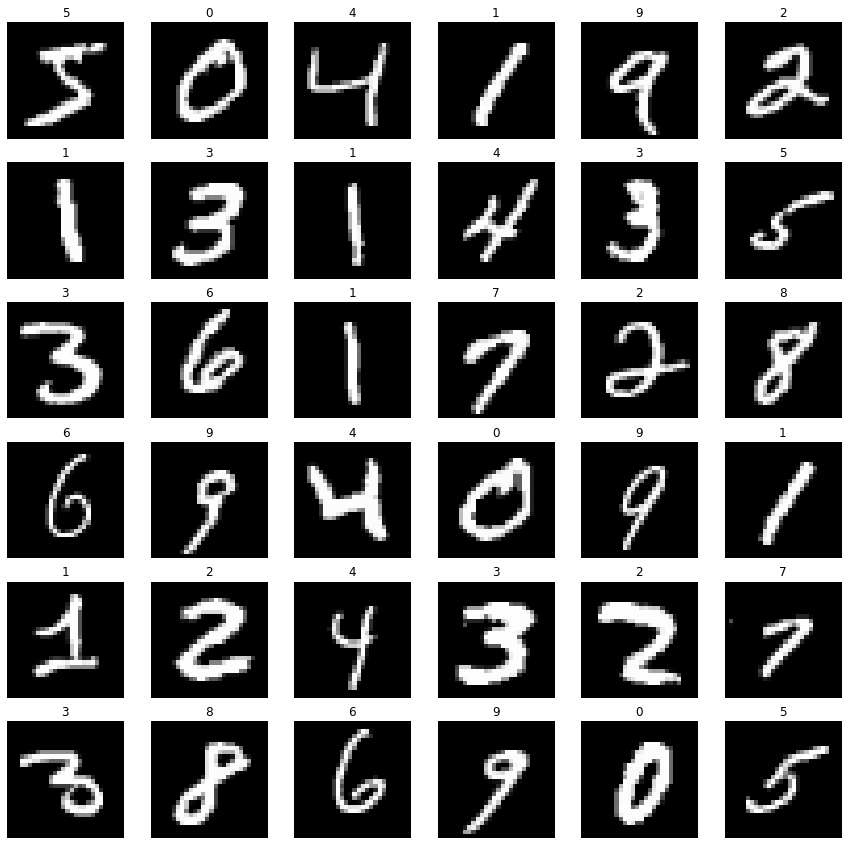

In [3]:
import matplotlib.pyplot as plt
import numpy as np

mnist_dataset = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()
X_train, X_test = X_train / 255, X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

samples = np.array([
    [0,  1,  2,  3,   4,  5],
    [6,  7,  8,  9,  10, 11],
    [12, 13, 14, 15, 16, 17],
    [18, 19, 20, 21, 22, 23],
    [24, 25, 26, 27, 28, 29],
    [30, 31, 32, 33, 34, 35]
])

for row in range(0, 6):
    for col in range(0, 6):
        current_image = X_train[samples[row, col]]
        axes[row, col].set_title(str(y_train[samples[row, col]].argmax()))
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image, cmap = 'gray')
        
X_train = np.expand_dims(X_train, axis = -1)
X_test  = np.expand_dims(X_test, axis = -1)
plt.show()

## Creating a Convolutional Neural Network Classification Model using tensorflow 2.x with keras

In [4]:
tf_model = Sequential()
tf_model.add(Conv2D(10, activation = 'relu', kernel_size = 3, input_shape = (28, 28, 1)))
tf_model.add(MaxPool2D(2))
tf_model.add(Conv2D(5, activation = 'relu', kernel_size = 3))
tf_model.add(MaxPool2D(2))
tf_model.add(Flatten())
tf_model.add(Dense(10, activation = 'softmax'))

tf_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
train_log = tf_model.fit(X_train, y_train, epochs = 10, validation_split = 0.20, verbose = 0)

In [6]:
y_predict = tf_model.predict(X_test)
_, tf_model_accuracy = tf_model.evaluate(X_test, y_test, verbose = 0)
print("accuracy: ", tf_model_accuracy)

accuracy:  0.9759


## Defining a Plotting Function for a Confusion Matrix

In [8]:
import pandas as pd
import seaborn as sns
import sklearn.metrics as sk_metrics

def confusion_plot(actuals, predictions):
    test_labels = actuals.argmax(axis = 1)
    pred_labels = predictions.argmax(axis = 1)
    confusion = sk_metrics.confusion_matrix(test_labels, pred_labels)
    confusion = confusion.astype("float") / confusion.sum(axis = 1)
    
    labels = [i for i in "0123456789"]
    df_cm = pd.DataFrame(confusion, index = labels, columns = labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (20, 14))
    sns.set(font_scale = 1.4)
    sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16})
    plt.show()

## Confusion Matrix For tf_model

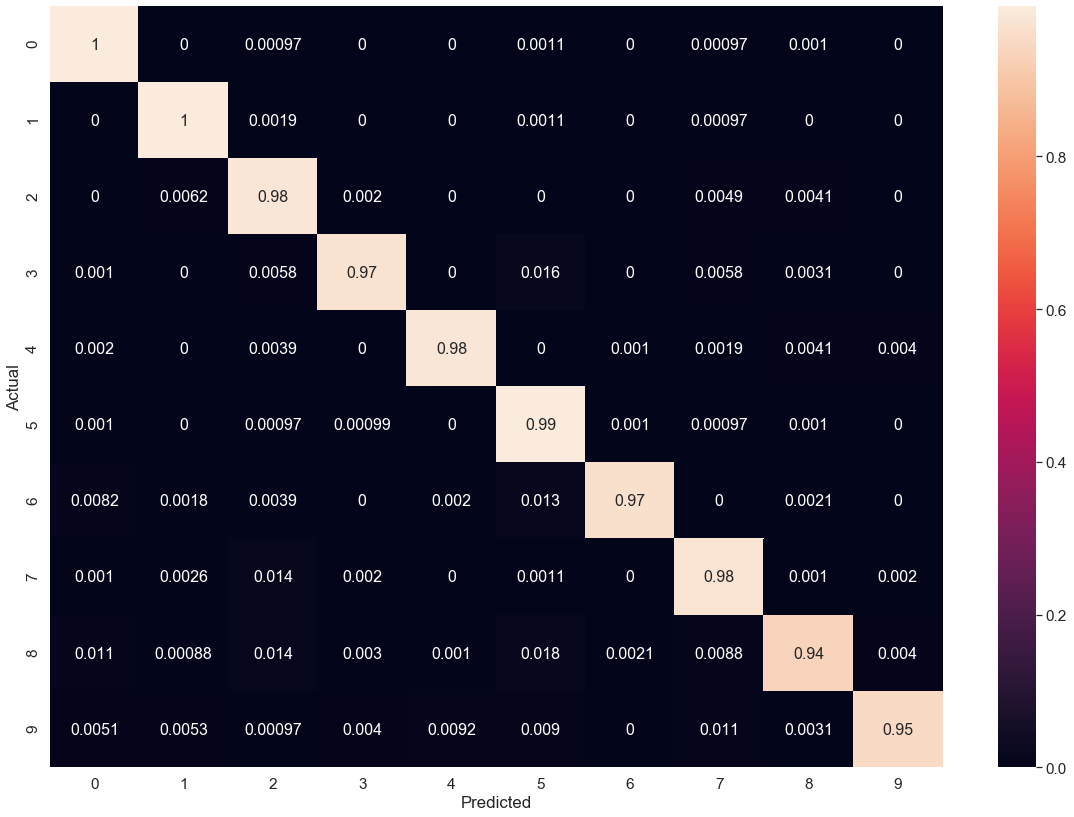

In [9]:
confusion_plot(y_test, y_predict)

## Training Curves

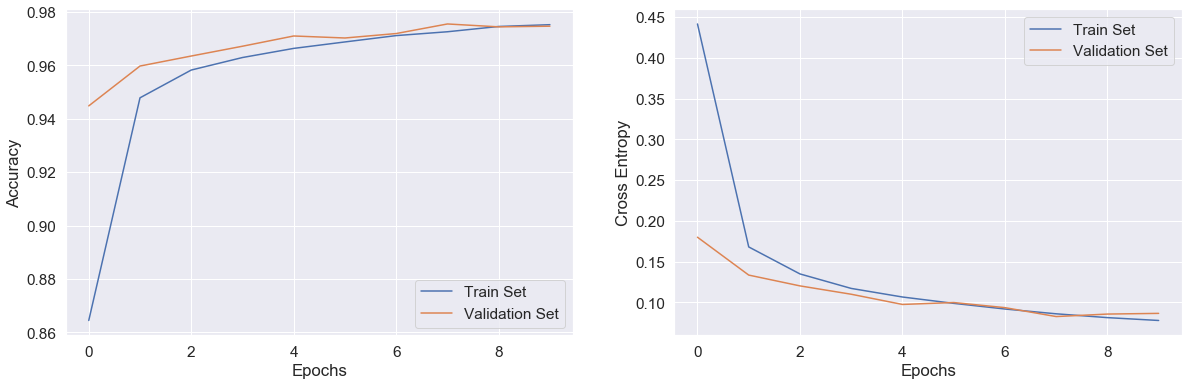

In [10]:
fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot([i for i in range(10)], train_log.history['accuracy'], label = 'Train Set')
plt.plot([i for i in range(10)], train_log.history['val_accuracy'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in range(10)], train_log.history['loss'], label = 'Train Set')
plt.plot([i for i in range(10)], train_log.history['val_loss'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.legend()

plt.show()